In [31]:
from utils import load_data, path, separate
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

warnings.filterwarnings('ignore')
training = load_data('../../data/training.csv')
validation = load_data('../../data/validation.csv')
trainX, trainY = separate(training)
testX, testY = separate(validation)

In [75]:
model = LinearRegression().fit(trainX, trainY)

In [19]:
# Mean Squared Error
def MSE(y_predicted, y):
    squared_error = (y_predicted - y) ** 2
    sum_squared_error = np.sum(squared_error)
    mse = sum_squared_error / y.size
    return (mse)

pred_train = model.predict(trainX)
pred_test = model.predict(testX)
error_train = MSE(pred_train, trainY)
error_test = MSE(pred_test, testY)
print (error_train, error_test)

In [28]:
model.coef_

array([[ 1.31699010e+01,  1.06535677e+00, -7.56934932e-02,
        -6.21769066e+00,  2.80446097e-01,  3.45896357e-06,
         1.11554654e+00],
       [ 9.34759451e-01, -7.90613506e-06, -4.89978560e-06,
         4.95665788e-04, -1.32541245e-04, -1.25815977e-09,
         2.39025329e-03]])

In [51]:
def train(nfold):
    kf = KFold(n_splits=nfold)
    coef = []
    intercept = []
    error_train = []
    error_test = []

    for train_index, test_index in kf.split(trainX):
        X_train, X_test = trainX[train_index], trainX[test_index]
        y_train, y_test = trainY[train_index], trainY[test_index]
        model = LinearRegression().fit(X_train, y_train)

        intercept.append(model.intercept_)
        coef.append(model.coef_)

        pred_train = model.predict(X_train)
        pred_test = model.predict(X_test)
        error_train.append(MSE(pred_train, y_train))
        error_test.append(MSE(pred_test, y_test))

    return (np.mean(error_train), np.mean(error_test), np.mean(intercept, axis=0), np.mean(coef, axis=0))
    

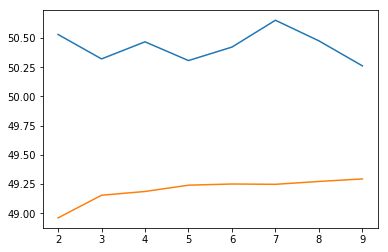

In [74]:
# try different k-fold cross validations
errors = []
folds = range(2, 10)
for i in folds:
    error_train, error_test, intercept, coef = train(i)
    errors.append([error_train, error_test])
    
errors = np.array(errors)
plt.plot(folds,  errors[:,[1]])
plt.plot(folds, errors[:,[0]])